# Xenium dataset

In [379]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanorama


## Run the single-cell dataset through the Seurat analysis until we get clusters

In [380]:
sc_dataset_id = "2a25e445-2776-8913-076f-9a147a43e8b4"  # P7, mouse, scRNA-seq, cochlea (Kelley)
h5_path = "../www/datasets/{}.h5ad".format(sc_dataset_id)
adata = sc.read_h5ad(h5_path)

# Already had primary analysis done

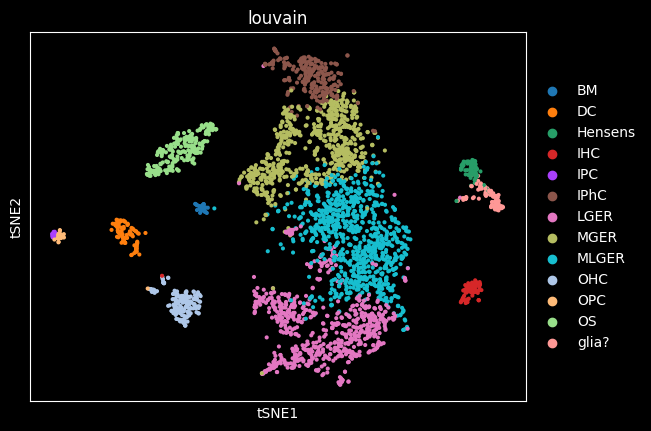

In [381]:
sc.pl.tsne(adata, color=["louvain"])


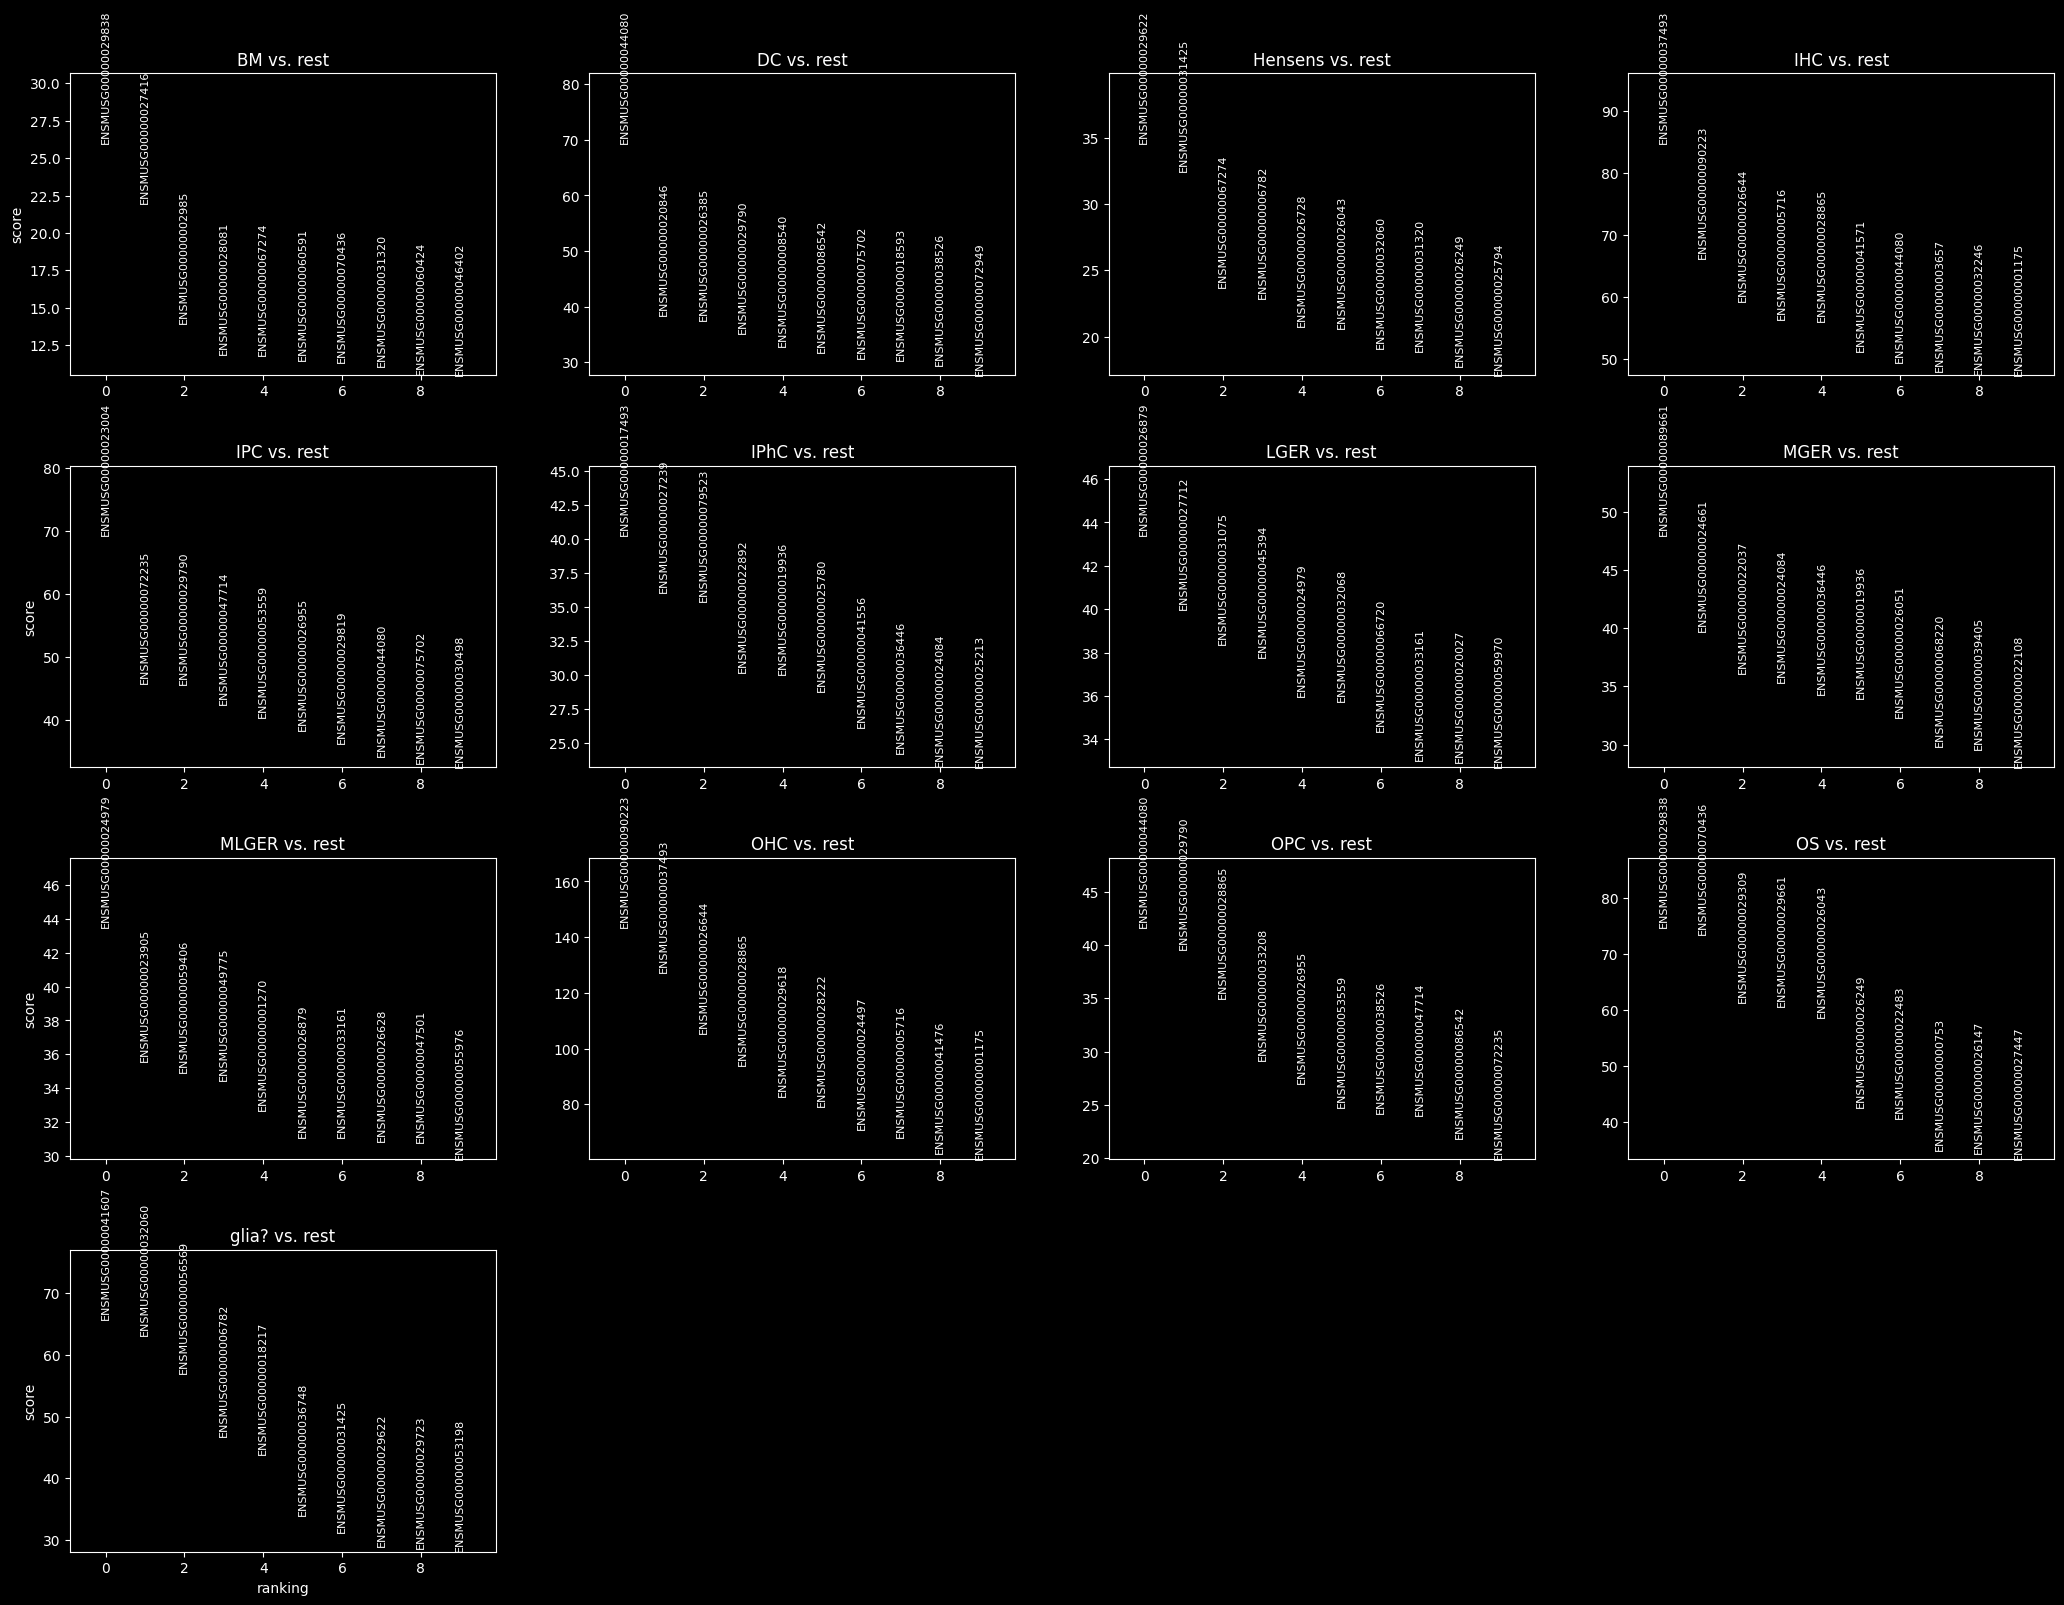

In [382]:
sc.tl.rank_genes_groups(adata, "louvain", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [383]:
all_marker_genes_df = pd.DataFrame(adata.uns["rank_genes_groups"]["names"])
marker_genes_df = all_marker_genes_df.head(10)


In [384]:
# Convert marker_genes_df to a binary dataframe where the rows are the marker genes and the columns are the clusters
# and the values are 1 if the marker gene is in the cluster and 0 otherwise

marker_genes_set  = set(marker_genes_df.values.flatten())

binary_gene_list_df = pd.DataFrame(0, index=list(marker_genes_set), columns=adata.obs["louvain"].cat.categories)
for cluster in adata.obs["louvain"].cat.categories:
    binary_gene_list_df.loc[marker_genes_df[cluster], cluster] = 1

# column 2 should included the gene symbol associated with the indexed ensembl id
binary_gene_list_df["gene_symbol"] = binary_gene_list_df.index.map(lambda x: adata.var.loc[x, "gene_symbol"])

# reorder columns where gene_symbol is first
cols = binary_gene_list_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
binary_gene_list_df = binary_gene_list_df[cols]

binary_gene_list_df

,gene_symbol,BM,DC,Hensens,IHC,IPC,IPhC,LGER,MGER,MLGER,OHC,OPC,OS,glia?
ENSMUSG00000024979,Tectb,0,0,0,0,0,0,1,0,1,0,0,0,0
ENSMUSG00000002985,Apoe,1,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000022037,Clu,0,0,0,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000067274,Rplp0,1,0,1,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000026043,Col3a1,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000038526,Car14,0,1,0,0,0,0,0,0,0,0,1,0,0
ENSMUSG00000046402,Rbp1,1,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000022108,Itm2b,0,0,0,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000053198,Prx,0,0,0,0,0,0,0,0,0,0,0,0,1


In [385]:
# all genes
all_marker_genes_set  = set(all_marker_genes_df.values.flatten())

z_scores = pd.DataFrame(adata.uns["rank_genes_groups"]["scores"])

weighted_gene_list_df = pd.DataFrame(data=z_scores.to_numpy(), index=list(all_marker_genes_set), columns=adata.obs["louvain"].cat.categories)

# column 2 should included the gene symbol associated with the indexed ensembl id
weighted_gene_list_df["gene_symbol"] = weighted_gene_list_df.index.map(lambda x: adata.var.loc[x, "gene_symbol"])

# reorder columns where gene_symbol is first
cols = weighted_gene_list_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
weighted_gene_list_df = weighted_gene_list_df[cols]

weighted_gene_list_df

,gene_symbol,BM,DC,Hensens,IHC,IPC,IPhC,LGER,MGER,MLGER,OHC,OPC,OS,glia?
ENSMUSG00000002835,Chaf1a,26.011190,69.446625,34.594326,84.800224,69.355278,40.304146,43.413303,47.990307,43.483368,143.497864,41.690781,74.815117,65.728821
ENSMUSG00000013936,Myl2,21.956736,38.377335,32.443466,66.287987,45.860878,36.052578,39.974586,39.695694,35.563339,127.211678,39.620995,73.595215,63.231537
ENSMUSG00000083669,Gm10169,13.925958,37.587360,23.665606,59.282501,45.589088,35.452888,38.397034,36.101082,34.911304,105.475739,34.976910,61.390030,56.948559
ENSMUSG00000020257,Wdr82,11.912612,35.233124,22.881481,56.462009,42.526321,30.168537,37.788780,35.348347,34.440033,93.874336,29.113977,60.606686,46.749332
ENSMUSG00000023087,Noct,11.785747,32.926147,20.765577,56.079533,40.327866,30.015028,35.973969,34.343143,32.703098,82.840477,26.989660,58.620697,43.922348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000085578,Gm11527,-17.962517,-30.372902,-47.122047,-42.208473,-46.188999,-24.695190,-26.611595,-21.139133,-21.125801,-54.203102,-41.052307,-60.719650,-43.003910
ENSMUSG00000005951,Shpk,-18.311049,-30.586393,-49.422054,-42.449478,-48.007809,-24.769772,-27.659681,-22.842966,-23.443329,-54.733055,-42.439995,-63.034065,-45.113621
ENSMUSG00000090272,Mndal,-18.514061,-33.177307,-49.597649,-43.366417,-48.675896,-27.388933,-28.972588,-23.747208,-23.770611,-60.174671,-44.121578,-65.936943,-45.703918
ENSMUSG00000020429,Igfbp1,-18.567232,-33.719257,-52.563988,-46.532417,-52.433228,-28.125324,-29.171398,-28.207315,-24.578011,-61.599915,-44.295685,-68.638710,-53.395271


## Normalize the spatial dataset

In [386]:
# import Xenium dataset
# These are Postnatal Day 7, Wild-type, CD-1 IGS Mice from Charles River (MAYBE)

import spatialdata_io as sdio
from spatialdata_io.experimental import to_legacy_anndata

xenium_dataset_path = "../Shults_SpatialData/output-XETG00202__0022744__Region_4__20240111__212612"
xenium_sdata = sdio.xenium(xenium_dataset_path)
xenium_sdata


INFO     reading ../Shults_SpatialData/output-XETG00202__0022744__Region_4__20240111__212612/cell_feature_matrix.h5


/var/folders/ms/ft2j_6k51t99np3jqp17lj9r0000gp/T/ipykernel_5985/3759460587.py:8: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  xenium_sdata = sdio.xenium(xenium_dataset_path)


SpatialData object
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 17102, 14296), (1, 8551, 7148), (1, 4275, 3574), (1, 2137, 1787), (1, 1068, 893)
│     └── 'morphology_mip': DataTree[cyx] (1, 17102, 14296), (1, 8551, 7148), (1, 4275, 3574), (1, 2137, 1787), (1, 1068, 893)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17102, 14296), (8551, 7148), (4275, 3574), (2137, 1787), (1068, 893)
│     └── 'nucleus_labels': DataTree[yx] (17102, 14296), (8551, 7148), (4275, 3574), (2137, 1787), (1068, 893)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (20718, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (20718, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (20718, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (20718, 292)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), morphology_mip (Images), cell

In [387]:
xen_adata = to_legacy_anndata(xenium_sdata, include_images=True)
xen_adata

/opt/homebrew/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


WARNING  The vector part of the transformation matrix is not isotropic, the radius will be scaled by the average of
         the modules of eigenvalues of the affine transformation matrix.                                           
         matrix=[[0.11695579 0.         0.        ]                                                                
          [0.         0.11694539 0.        ]                                                                       
          [0.         0.         1.        ]]                                                                      
         eigenvalues=[0.11695579 0.11694539]                                                                       
         scale_factor=0.11695058916719245                                                                          
WARNING  The vector part of the transformation matrix is not isotropic, the radius will be scaled by the average of
         the modules of eigenvalues of the affine transformation matrix.

AnnData object with n_obs × n_vars = 20718 × 292
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs', 'spatial'
    obsm: 'spatial'

In [388]:
xen_adata.obs

,cell_id,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,region,cell_labels
0,aaaacnmh-1,74,0,0,1,0,75,32.828595,10.656875,cell_circles,1
1,aaaeagcm-1,54,0,0,0,0,54,27.048595,5.509063,cell_circles,2
2,aaaeljdg-1,114,0,0,1,0,115,45.201408,18.920469,cell_circles,3
3,aaamlboo-1,97,0,0,0,0,97,42.266252,22.216876,cell_circles,4
4,aabbkkdc-1,175,0,0,0,0,175,55.316408,36.125001,cell_circles,5
...,...,...,...,...,...,...,...,...,...,...,...
20713,oickgace-1,197,0,0,0,0,197,110.542504,27.274376,cell_circles,20714
20714,oicndcjh-1,274,0,0,0,0,274,199.816414,56.896877,cell_circles,20715
20715,oidgajbb-1,166,0,0,0,0,166,149.918755,17.340001,cell_circles,20716
20716,oidhpejc-1,108,0,0,0,0,108,29.487032,11.063282,cell_circles,20717


In [389]:
xen_adata.var_names_make_unique()

# currently gene symbols are the index, need to move them to a column
xen_adata.var["gene_symbol"] = xen_adata.var.index

# set the index to the ensembl id (gene_ids)
xen_adata.var.set_index("gene_ids", inplace=True)

xen_adata.var

,feature_types,genome,gene_symbol
gene_ids,,,
ENSMUSG00000045237,Gene Expression,Unknown,1110012L19Rik
ENSMUSG00000101655,Gene Expression,Unknown,2310040G24Rik
ENSMUSG00000085936,Gene Expression,Unknown,2610307P16Rik
ENSMUSG00000036411,Gene Expression,Unknown,9530077C05Rik
ENSMUSG00000095041,Gene Expression,Unknown,AC149090.1
...,...,...,...
ENSMUSG00000018849,Gene Expression,Unknown,Wwc1
ENSMUSG00000037855,Gene Expression,Unknown,Zfp365
ENSMUSG00000045333,Gene Expression,Unknown,Zfp423


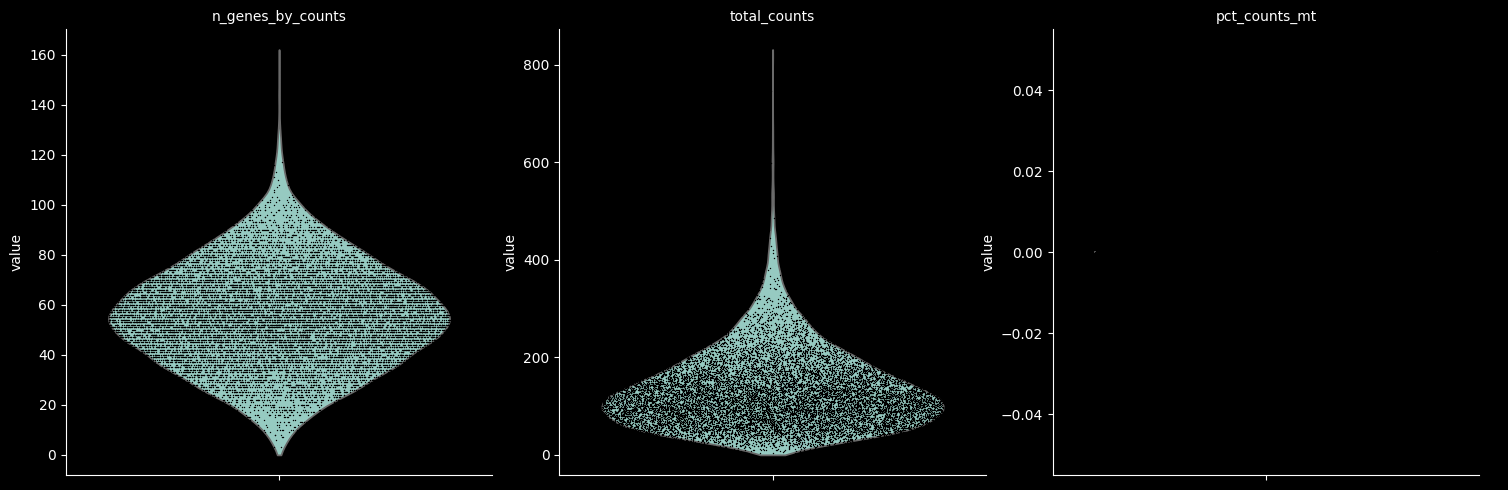

In [390]:
# calc qc metrics does not work with this adata object

xen_adata.var["mt"] = xen_adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(xen_adata, qc_vars=["mt"], percent_top=[50, 100, 200], inplace=True)

# default percent_top is [50, 100, 200, 500], which will error because only 292 observations.  So we will use [50, 100, 200]

sc.pl.violin(
    xen_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)


In [391]:
sc.pp.filter_genes(xen_adata, min_cells=50)
sc.pp.normalize_total(xen_adata, inplace=True)
sc.pp.log1p(xen_adata)
sc.pp.highly_variable_genes(xen_adata, flavor="seurat", n_top_genes=2000, inplace=True)

/opt/homebrew/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [392]:
xen_adata.var.head()

,feature_types,genome,gene_symbol,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
gene_ids,,,,,,,,,,,,,,,
ENSMUSG00000045237,Gene Expression,Unknown,1110012L19Rik,False,3416,0.193600,0.176974,83.511922,4011.0,8.297045,3416,True,0.160113,0.359825,-1.116018
ENSMUSG00000101655,Gene Expression,Unknown,2310040G24Rik,False,588,0.036924,0.036259,97.161888,765.0,6.641182,588,True,0.031597,0.571587,-0.152845
ENSMUSG00000085936,Gene Expression,Unknown,2610307P16Rik,False,2309,0.131045,0.123142,88.855102,2715.0,7.906916,2309,True,0.120354,0.608334,-0.424910
ENSMUSG00000036411,Gene Expression,Unknown,9530077C05Rik,False,802,0.044551,0.043587,96.128970,923.0,6.828712,802,True,0.036590,0.494921,-0.352899
ENSMUSG00000095041,Gene Expression,Unknown,AC149090.1,False,14006,1.692827,0.990592,32.396950,35072.0,10.465187,14006,True,0.918951,0.635393,-0.733869


### Scanorama cluster predictions

In [393]:
adatas = [adata, xen_adata]
xen_adata_cor = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 276 genes among all datasets
[[0.         0.39290946]
 [0.         0.        ]]
Processing datasets (0, 1)


In [394]:
xen_adata_cor
# two adata objects are returned, the first is the corrected single-cell adata object and the second is the corrected visium adata object

# The X_scanorama attribute in each object contains the low dimensional embeddings as a result of integration, which can be used for KNN graph construction

[AnnData object with n_obs × n_vars = 3413 × 276
     obs: 'cell_type', 'tSNE_1', 'tSNE_2', 'replicate', 'louvain'
     var: 'gene_symbol'
     uns: 'louvain_colors', 'rank_genes_groups'
     obsm: 'X_tsne', 'X_scanorama',
 AnnData object with n_obs × n_vars = 20718 × 276
     obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
     var: 'feature_types', 'genome', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'spatialdata_attrs', 

In [395]:
xen_adata_concat = sc.concat(
    xen_adata_cor,
    label="dataset",
    keys=["single-cell", "visium"],
    join="outer",
    uns_merge="first",
)

In [396]:
# the "dataset" label this is added to the obs column is used to distinguish between the single-cell and visium datasets
xen_adata_concat

AnnData object with n_obs × n_vars = 24131 × 276
    obs: 'cell_type', 'tSNE_1', 'tSNE_2', 'replicate', 'louvain', 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'dataset'
    uns: 'louvain_colors', 'rank_genes_groups', 'spatialdata_attrs', 'spatial', 'log1p', 'hvg'
    obsm: 'X_tsne', 'X_scanorama', 'spatial'

In [397]:
from sklearn.metrics.pairwise import cosine_distances

distances = 1 - cosine_distances(
    xen_adata_concat[xen_adata_concat.obs.dataset == "single-cell"].obsm[
        "X_scanorama"
    ],
    xen_adata_concat[xen_adata_concat.obs.dataset == "visium"].obsm[
        "X_scanorama"
    ],
)
distances.shape

(3413, 20718)

In [398]:
def label_transfer(dist, labels):
    lab = pd.get_dummies(labels).to_numpy().T
    class_prob = lab @ dist
    norm = np.linalg.norm(class_prob, 2, axis=0)
    class_prob = class_prob / norm
    class_prob = (class_prob.T - class_prob.min(1)) / class_prob.ptp(1)
    return class_prob

# Need to use the louvain from the single-cell dataset to match the n_obs of the distances matrix position 0
class_prob = label_transfer(distances, adata.obs.louvain)

# output is the probability of each cluster for each spatial location
class_prob.shape


(20718, 13)

In [399]:
# for each spatial location, find the cluster with the highest probability
# this is the predicted cluster for each spatial location
predicted_clusters = np.argmax(class_prob, axis=1)

# predicted_clusters is a numpy array of index positions used to index into the adata.obs.louvain.cat.categories
# to get the actual cluster names

# add the predicted clusters to the visium adata object

xen_adata.obs["scanorama_predicted_clusters"] = pd.Categorical(
    [adata.obs.louvain.cat.categories[i] for i in predicted_clusters]
)
xen_adata.obs


,cell_id,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,region,...,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,scanorama_predicted_clusters
0,aaaacnmh-1,74,0,0,1,0,74.0,32.828595,10.656875,cell_circles,...,47,3.871201,4.317488,100.000000,100.0,100.0,0.0,0.0,0.0,OS
1,aaaeagcm-1,54,0,0,0,0,54.0,27.048595,5.509063,cell_circles,...,36,3.610918,4.007333,100.000000,100.0,100.0,0.0,0.0,0.0,OS
2,aaaeljdg-1,114,0,0,1,0,114.0,45.201408,18.920469,cell_circles,...,64,4.174387,4.744932,87.719298,100.0,100.0,0.0,0.0,0.0,OS
3,aaamlboo-1,97,0,0,0,0,97.0,42.266252,22.216876,cell_circles,...,52,3.970292,4.584968,97.938144,100.0,100.0,0.0,0.0,0.0,OS
4,aabbkkdc-1,175,0,0,0,0,175.0,55.316408,36.125001,cell_circles,...,82,4.418841,5.170484,81.714286,100.0,100.0,0.0,0.0,0.0,OS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,oickgace-1,197,0,0,0,0,197.0,110.542504,27.274376,cell_circles,...,83,4.430817,5.288267,83.248731,100.0,100.0,0.0,0.0,0.0,DC
20714,oicndcjh-1,274,0,0,0,0,274.0,199.816414,56.896877,cell_circles,...,74,4.317488,5.616771,91.240876,100.0,100.0,0.0,0.0,0.0,OPC
20715,oidgajbb-1,166,0,0,0,0,166.0,149.918755,17.340001,cell_circles,...,46,3.850148,5.117994,100.000000,100.0,100.0,0.0,0.0,0.0,DC
20716,oidhpejc-1,108,0,0,0,0,108.0,29.487032,11.063282,cell_circles,...,57,4.060443,4.691348,93.518519,100.0,100.0,0.0,0.0,0.0,DC


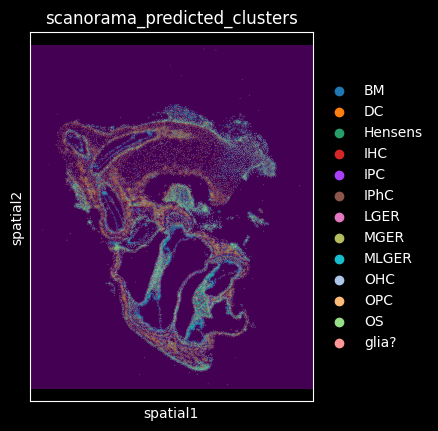

In [400]:
# Need to choose a library ID to use for the spatial plot
# Either "morphology_mip" (maxiumum intensity projection) or "morphology_focus" (single best focux Z-plane)
sc.pl.spatial(xen_adata, color="scanorama_predicted_clusters", img_key="hires", library_id="morphology_mip")

In [401]:
xen_adata.obs.value_counts("scanorama_predicted_clusters")

scanorama_predicted_clusters
DC         7610
OS         6272
MLGER      1955
MGER       1288
LGER       1101
IHC         984
Hensens     633
OPC         310
IPhC        193
glia?       167
OHC         133
IPC          58
BM           14
Name: count, dtype: int64

In [402]:
xen_adata.uns["spatial"]["morphology_mip"]["images"].keys()

dict_keys(['hires', 'lowres'])

### Leiden clustering on spatial dataset

In [403]:
sc.pp.pca(xen_adata)
sc.pp.neighbors(xen_adata)
sc.tl.tsne(xen_adata)

# I keep adjusting until the resolution setting makes clusters roughly match the single-cell clusters
sc.tl.leiden(
    xen_adata, key_added="spatial_clusters", flavor="igraph", directed=False, resolution=0.3
)

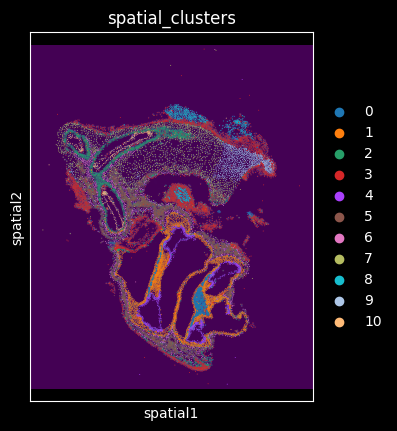

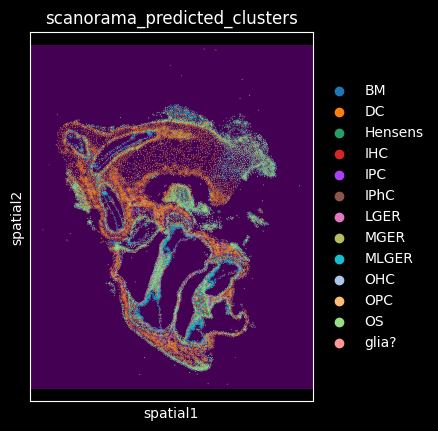

In [404]:
sc.pl.spatial(xen_adata, img_key="hires", color="spatial_clusters", size=1.5, library_id="morphology_mip")
sc.pl.spatial(xen_adata, img_key="hires", color="scanorama_predicted_clusters", size=1.5, library_id="morphology_mip")


### ProjectR cluster transferrence

In [405]:
# Drop the gene symbol column
#loading_df = weighted_gene_list_df.drop(weighted_gene_list_df.columns[0], axis=1)

loading_df = binary_gene_list_df.drop(binary_gene_list_df.columns[0], axis=1)


# Drop duplicate unique identifiers. This may happen if two unweighted gene cart genes point to the same Ensembl ID in the db
loading_df = loading_df[~loading_df.index.duplicated(keep='first')]


num_target_genes = xen_adata.shape[1]
num_loading_genes = loading_df.shape[0]

# Perform overlap to see if there are overlaps between genes from both dataframes
index_intersection = xen_adata.var.index.intersection(loading_df.index)
intersection_size = index_intersection.size
intersection_size

9

In [406]:
# Reduce the size of both dataframes before POSTing
projection_xen_adata = xen_adata[:,index_intersection]
target_df = projection_xen_adata.to_df().transpose()
loading_df = loading_df.loc[index_intersection]

In [407]:
def calculate_chunk_size(num_genes, num_samples):
    """
    Calculate number of chunks to divide all samples into.
    """
    TOTAL_DATA_LIMIT = 5e6  # normally 1e6
    total_data = num_genes * num_samples
    total_data_chunks = total_data / TOTAL_DATA_LIMIT
    return int(num_samples / total_data_chunks) # ta

# Chunk size needs to adjusted by how many genes are present, so that the payload always stays under the body size limit
chunk_size = calculate_chunk_size(len(target_df.index), len(target_df.columns))

In [408]:
import asyncio
import aiohttp
from more_itertools import sliced

projectr_url = "https://staging---projectr-service-ruvt5l3uva-uk.a.run.app"

# limit of asynchronous tasks that can happen at a time
# I am setting this slightly under the "MaxKeepAliveRequests" in apache.conf
SEMAPHORE_LIMIT = 50

import sys, os
lib_path = os.path.abspath(os.path.join('..', 'lib'))
sys.path.append(lib_path)

# https://stackoverflow.com/a/35904211/1368079
this = sys.modules[__name__]
from gear.serverconfig import ServerConfig
this.servercfg = ServerConfig().parse()

def chunk_dataframe(df, chunk_size):
    # Chunk dataset by samples/cells (cols). Is a generator function
    # Help from: https://stackoverflow.com/questions/51674751/using-requests-library-to-make-asynchronous-requests-with-python-3-7
    index_slices = sliced(range(len(df.columns)), chunk_size)
    print("Number of slices: ", len(df.columns) / chunk_size)
    for idx, index_slice in enumerate(index_slices):
        yield df.iloc[:,index_slice]


async def fetch_all(target_df, loading_df, algo, chunk_size):
    """Create coroutine tasks out of all chunked projection cloud run service POST requests."""

    async with aiohttp.ClientSession() as client:
        # Create coroutines to be executed.
        loadings_json = loading_df.to_json(orient="split")
        coros = (fetch_one(client, {
                "target": chunk_df.to_json(orient="split")
                , "loadings": loadings_json
                , "algorithm": algo
                , "genecart_id":"1234" # This helps in identifying which combinations are going through
                , "dataset_id":"abcde"
                }) for chunk_df in chunk_dataframe(target_df, chunk_size))

        # This loop processes results as they come in.
        return [await res for res in limited_as_completed(coros, SEMAPHORE_LIMIT)]

async def fetch_one(client, payload):
    """
    makes an non-authorized POST request to the specified HTTP endpoint
    """

    # brief sleep
    await asyncio.sleep(1)


    # Cloud Run uses your service's hostname as the `audience` value
    # audience = 'https://my-cloud-run-service.run.app/'
    # For Cloud Run, `endpoint` is the URL (hostname + path) receiving the request
    # endpoint = 'https://my-cloud-run-service.run.app/my/awesome/url'

    audience=this.servercfg['projectR_service']['hostname']
    endpoint="{}/".format(audience)
    headers = {"content_type": "application/json"}

    # https://docs.aiohttp.org/en/stable/client_reference.html
    # (semaphore) https://stackoverflow.com/questions/40836800/python-asyncio-semaphore-in-async-await-function
    async with client.post(url=endpoint, json=payload, headers=headers, raise_for_status=True) as response:
        return await response.json()

def limited_as_completed(coros, limit):
    """A version of asyncio.as_completed that takes a generator of coroutines instead of a list."""
    # Source: https://www.artificialworlds.net/blog/2017/05/31/python-3-large-numbers-of-tasks-with-limited-concurrency/
    # Uses far less memory than the list version (asyncio.as_completed)
    from itertools import islice
    futures = {
        asyncio.ensure_future(c)
        for c in islice(coros, 0, limit)
    }
    async def first_to_finish():
        nonlocal futures
        # Suggested by commenter "ruslan" in the URL. Using "while True" can be CPU-intensive
        done, futures = await asyncio.wait(futures, return_when=asyncio.FIRST_COMPLETED)
        # then re-fill the set of futures from the coros iterable
        try:
            newf = next(coros)
            futures.add(
                asyncio.ensure_future(newf))
        except StopIteration as e:
            pass
        # Pass the new done results back
        return done.pop().result()

    while futures:
        yield first_to_finish()

In [409]:
# Jupyter notebooks already run in an event loop, so we can just use the current event loop
results = await fetch_all(target_df, loading_df, "pca", chunk_size)

Number of slices:  0.037292437292437294


In [410]:
def concat_fetch_results_to_dataframe(res_jsons):
    # Concatenate the dataframes back together again
    res_dfs = [pd.read_json(res_json, orient="split", dtype="float32") for res_json in res_jsons]
    projection_patterns_df = pd.concat(res_dfs)
    return projection_patterns_df

projection_patterns_df = concat_fetch_results_to_dataframe(results)
# There is a good chance the samples are now out of order, which will break
# the copying of the dataset observation metadata when this output is converted
# to an AnnData object. So reorder back to dataset sample order.
projection_patterns_df = projection_patterns_df.reindex(xen_adata.obs.index.tolist())

# Have had cases where the column names are x1, x2, x3, etc. so load in the original pattern names
projection_patterns_df = projection_patterns_df.set_axis(loading_df.columns, axis="columns")
projection_patterns_df.shape

/var/folders/ms/ft2j_6k51t99np3jqp17lj9r0000gp/T/ipykernel_5985/789181730.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  res_dfs = [pd.read_json(res_json, orient="split", dtype="float32") for res_json in res_jsons]


(20718, 13)

In [411]:
# for each spatial location, find the cluster with the highest probability
# this is the predicted cluster for each spatial location
predicted_clusters = np.argmax(projection_patterns_df, axis=1)

# predicted_clusters is a numpy array of index positions used to index into the adata.obs.louvain.cat.categories
# to get the actual cluster names

# add the predicted clusters to the visium adata object

xen_adata.obs["projectr_predicted_clusters"] = pd.Categorical(
    [adata.obs.louvain.cat.categories[i] for i in predicted_clusters]
)
xen_adata.obs

,cell_id,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,region,...,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,scanorama_predicted_clusters,spatial_clusters,projectr_predicted_clusters
0,aaaacnmh-1,74,0,0,1,0,74.0,32.828595,10.656875,cell_circles,...,4.317488,100.000000,100.0,100.0,0.0,0.0,0.0,OS,0,BM
1,aaaeagcm-1,54,0,0,0,0,54.0,27.048595,5.509063,cell_circles,...,4.007333,100.000000,100.0,100.0,0.0,0.0,0.0,OS,1,BM
2,aaaeljdg-1,114,0,0,1,0,114.0,45.201408,18.920469,cell_circles,...,4.744932,87.719298,100.0,100.0,0.0,0.0,0.0,OS,1,BM
3,aaamlboo-1,97,0,0,0,0,97.0,42.266252,22.216876,cell_circles,...,4.584968,97.938144,100.0,100.0,0.0,0.0,0.0,OS,1,BM
4,aabbkkdc-1,175,0,0,0,0,175.0,55.316408,36.125001,cell_circles,...,5.170484,81.714286,100.0,100.0,0.0,0.0,0.0,OS,3,BM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,oickgace-1,197,0,0,0,0,197.0,110.542504,27.274376,cell_circles,...,5.288267,83.248731,100.0,100.0,0.0,0.0,0.0,DC,5,BM
20714,oicndcjh-1,274,0,0,0,0,274.0,199.816414,56.896877,cell_circles,...,5.616771,91.240876,100.0,100.0,0.0,0.0,0.0,OPC,6,BM
20715,oidgajbb-1,166,0,0,0,0,166.0,149.918755,17.340001,cell_circles,...,5.117994,100.000000,100.0,100.0,0.0,0.0,0.0,DC,6,BM
20716,oidhpejc-1,108,0,0,0,0,108.0,29.487032,11.063282,cell_circles,...,4.691348,93.518519,100.0,100.0,0.0,0.0,0.0,DC,5,BM


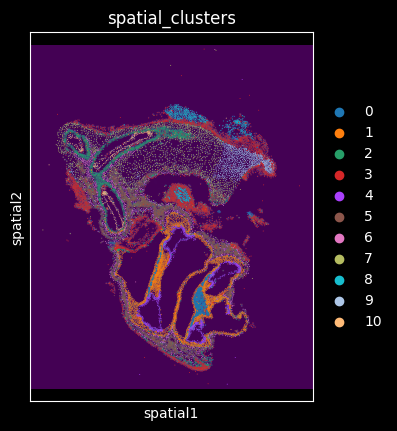

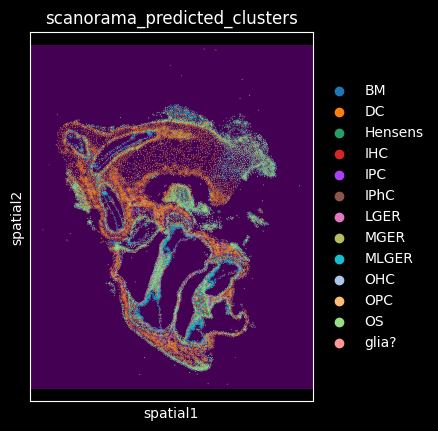

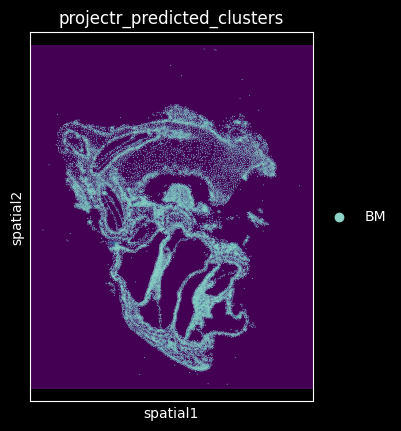

In [412]:
sc.pl.spatial(xen_adata, img_key="hires", color="spatial_clusters", size=1.5, na_color="grey", library_id="morphology_mip")
sc.pl.spatial(xen_adata, img_key="hires", color="scanorama_predicted_clusters", size=1.5, na_color="grey", library_id="morphology_mip")
sc.pl.spatial(xen_adata, img_key="hires", color="projectr_predicted_clusters", size=1.5, na_color="grey", library_id="morphology_mip")


In [413]:
xen_adata.obs.value_counts("spatial_clusters")

spatial_clusters
3     4767
5     4044
1     3687
2     2019
7     1581
6     1218
0      907
4      892
9      668
8      596
10     339
Name: count, dtype: int64

In [414]:
xen_adata.obs.value_counts("scanorama_predicted_clusters")

scanorama_predicted_clusters
DC         7610
OS         6272
MLGER      1955
MGER       1288
LGER       1101
IHC         984
Hensens     633
OPC         310
IPhC        193
glia?       167
OHC         133
IPC          58
BM           14
Name: count, dtype: int64

In [415]:
xen_adata.obs.value_counts("projectr_predicted_clusters")

projectr_predicted_clusters
BM    20718
Name: count, dtype: int64